## Bibliothèques

In [12]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Numpy and Pandas
import numpy as np
# Ohter import
from PIL import Image

## Nos images initialement

array([66, 48, 38], dtype=uint8)

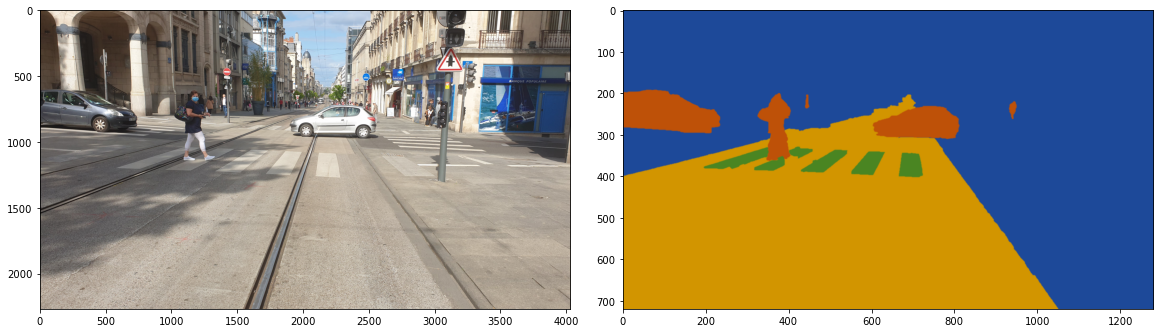

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open("dataset_src/images_prepped_train_src2/055.jpg"))
axs[0].grid(False)

label_image = Image.open("dataset_src/annotations_prepped_train_src2/055.png")
label_image = np.asarray(label_image)
axs[1].imshow(label_image)
axs[1].grid(False)

img=Image.open("dataset_src/images_prepped_train_src2/055.jpg")
img = np.asarray(img)
img[230][10]

## Fonctions utiles pour passer d'un pixel \[R,G,B\] à un numéro de classe

In [14]:
def annoter(image):
    height=len(image)
    width=len(image[0])
    img=np.zeros((height, width),dtype=np.uint8)
    for i in range (height):
        for j in range (width):
            img[i][j]=pattern(image[i][j])
    return img

def annoter_matlab(image):
    height=len(image)
    width=len(image[0])
    img = image.copy()
    for i in range (height):
        for j in range (width):
            img[i][j][0]=pattern_matlab(image[i][j])[0]
            img[i][j][1]=pattern_matlab(image[i][j])[1]
            img[i][j][2]=pattern_matlab(image[i][j])[2]
    return img

In [15]:
def pattern(RGB):
    if RGB[0]<RGB[1] and RGB[1]<RGB[2]: #bords
        return 0
    if RGB[0]!=0 and RGB[2]==0 : #route
        return 1
    if RGB[0]<RGB[1] and RGB[1]>RGB[2]: #passage pieton
        return 2
    if RGB[0]>RGB[1] and RGB[1]>RGB[2]: #obstacle
        return 3
    else: #route
        return 1

def pattern_matlab(RGB):
    if RGB[0]<RGB[1] and RGB[1]<RGB[2]: #bords
        return [128,128,0]
    if RGB[0]!=0 and RGB[2]==0 : #route
        return [128,64,128]
    if RGB[0]<RGB[1] and RGB[1]>RGB[2]: #passage pieton
        return [64,128,192]
    if RGB[0]>RGB[1] and RGB[1]>RGB[2]: #obstacle
        return [128,0,0]
    else: #route
        return [128,64,128]

## Resizing & Data-Augmentation : un exemple concret

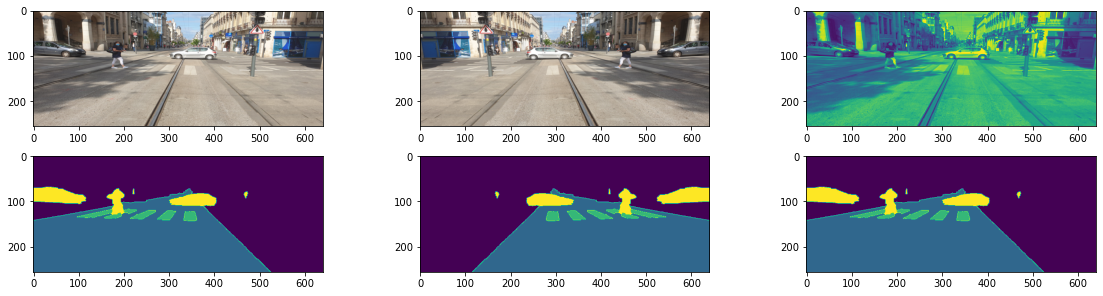

In [16]:
## Importation

image = Image.open("dataset_src/images_prepped_train_src2/055.jpg")
target = Image.open("dataset_src/annotations_prepped_train_src2/055.png")

## Resizing

image = image.resize((640, 256))
target = target.resize((640, 256))

## Data augmentation

image_hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
target_hoz_flip = target.transpose(Image.FLIP_LEFT_RIGHT)
image_gs = image.convert(mode='L')
target_gs = target #meme target que img normale en grayscale

## Transform into array

target = np.asarray(target)
target_hoz_flip = np.asarray(target_hoz_flip)

## Annoter les couleurs

target=annoter(target)
target_hoz_flip=annoter(target_hoz_flip)
target_gs = target

## Affichage

fig, axs = plt.subplots(2, 3, figsize=(16, 4), constrained_layout=True)
axs[0][0].imshow(image)
axs[0][1].imshow(image_hoz_flip)
axs[0][2].imshow(image_gs)
axs[1][0].imshow(target)
axs[1][1].imshow(target_hoz_flip)
axs[1][2].imshow(target_gs)

## Fonction pour généraliser le principe précédent à tout notre dataset

In [23]:
def augmenter(i):

    ## Importation
    image = Image.open("dataset_src/images_prepped_train_src2/0" + str(i) + ".jpg")
    target = Image.open("dataset_src/annotations_prepped_train_src2/0" + str(i) + ".png")

    ## Resizing
    image = image.resize((640, 256))
    target = target.resize((640, 256))

    ## Data augmentation
    image_hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
    target_hoz_flip = target.transpose(Image.FLIP_LEFT_RIGHT)
    image_gs = image.convert(mode='L')
    target_gs = target

    ## Convertir les images en array
    target = np.asarray(target)
    target_hoz_flip = np.asarray(target_hoz_flip)

    ## Annoter les couleurs
    target_matlab=annoter_matlab(target)
    target=annoter(target)
    target_hoz_flip_matlab=annoter_matlab(target_hoz_flip)
    target_hoz_flip=annoter(target_hoz_flip)
    target_gs = target

    ## Convertir les array en images
    target = Image.fromarray(target)
    target_matlab = Image.fromarray(target_matlab)
    target_hoz_flip = Image.fromarray(target_hoz_flip)
    target_hoz_flip_matlab = Image.fromarray(target_hoz_flip_matlab)
    target_gs = target

    ## Exporter toutes les nouvelles images
    image.save("dataset/images_prepped_train/0" + str(i) + "_1.png")
    image_hoz_flip.save("dataset/images_prepped_train/0" + str(i) + "_2.png")
    image_gs.save("dataset/images_prepped_train/0" + str(i) + "_3.png")

    target.save("dataset/annotations_prepped_train/0" + str(i) + "_1.png")
    target_hoz_flip.save("dataset/annotations_prepped_train/0" + str(i) + "_2.png")
    target_gs.save("dataset/annotations_prepped_train/0" + str(i) + "_3.png")

    image.save("dataset/images_prepped_train_matlab/0" + str(i) + "_1.png")
    image_hoz_flip.save("dataset/images_prepped_train_matlab/0" + str(i) + "_2.png")

    target_matlab.save("dataset/annotations_prepped_train_matlab/0" + str(i) + "_1.png")
    target_hoz_flip_matlab.save("dataset/annotations_prepped_train_matlab/0" + str(i) + "_2.png")

In [24]:
for i in range (38,61):
    augmenter(i)